In [1]:
from time import time
import datetime
from operator import itemgetter
import csv

import utils
import data_utils

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation as cv
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV

from scipy.stats import randint as sp_randint

In [2]:
# Utility function to report best scores
def report(grid_scores, n_top=20):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(score.cv_validation_scores)
        print("Mean validation score: {0:.10f} (std: {1:.10f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print(score.parameters)
        print("")

In [58]:
df = pd.DataFrame(np.random.randn(10000,4),columns=('x1', 'x2', 'x3', 'y'))
df['y'] = 2*df.x1.pow(2) + 2*df.x2.pow(3) + 1*df.x3.pow(4) + 2*df.y

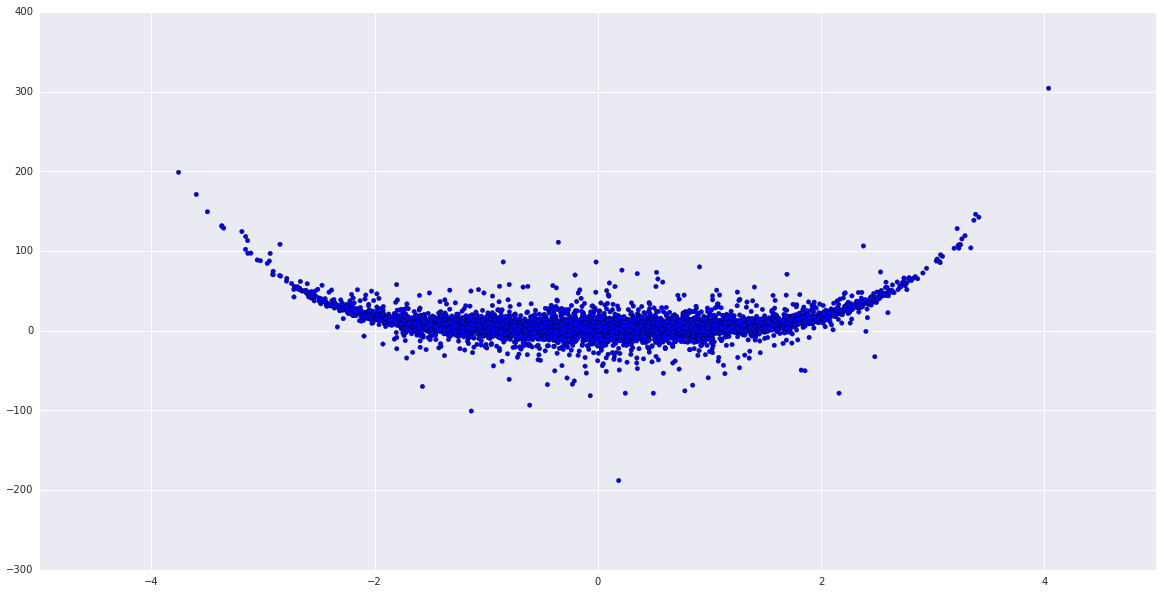

In [59]:
plt.figure(figsize=(20, 10))
plt.scatter(x=df.x3, y=df.y)
X_train = df[['x1', 'x2', 'x3']].values
y_train = df.y.values

In [60]:
n_features = X_train.shape[1]
N_FOLDS = 10

In [61]:
model = RandomForestRegressor()
# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(1, 30),
              "max_features": sp_randint(1, n_features),
              "min_samples_split": sp_randint(1, 3*n_features),
#              "max_depth": [15],
#              "max_features": [3],
#              "min_samples_split": [1],
              "random_state": [42],
              "min_samples_leaf": sp_randint(1, 3*n_features),
#              "min_samples_leaf": [1, 2],
#              "bootstrap": [True, False],
#              "oob_score": [True, False]
             }

# run randomized search
n_iter_search = 20
folds = cv.KFold(n=len(y_train), n_folds=N_FOLDS, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   cv=folds,
                                   n_jobs=-1,
                                   scoring=utils.rmspe_scorer,
                                   iid=False,
                                   error_score=-99.99
                                  )
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 16.38 seconds for 20 candidates parameter settings.
Model with rank: 1
[  -5.23566354   -4.13111896  -10.80628528  -11.09045903   -8.99445216
  -10.12630674  -18.31262579  -20.97660184 -104.52351953  -19.10009274]
Mean validation score: -21.3297125615 (std: 28.2550491845)
Parameters: {'max_features': 2, 'min_samples_split': 1, 'random_state': 42, 'max_depth': 16, 'min_samples_leaf': 4}
{'max_features': 2, 'min_samples_split': 1, 'random_state': 42, 'max_depth': 16, 'min_samples_leaf': 4}

Model with rank: 2
[  -4.96760706   -3.8530254   -10.03900424  -12.09336995   -7.63675384
   -9.70258183  -17.34996079  -40.65620268 -100.8804099   -14.43801525]
Mean validation score: -22.1616930926 (std: 28.0479396118)
Parameters: {'max_features': 2, 'min_samples_split': 1, 'random_state': 42, 'max_depth': 19, 'min_samples_leaf': 7}
{'max_features': 2, 'min_samples_split': 1, 'random_state': 42, 'max_depth': 19, 'min_samples_leaf': 7}

Model with rank: 3
[  -5.87017769   -3.7

## Test the RFR Parameters

In [62]:
params = {'max_features': 2, 'min_samples_split': 1, 'random_state': 42, 'max_depth': 14, 'min_samples_leaf': 8}
model = RandomForestRegressor(**params)
folds = cv.KFold(n=len(y_train), n_folds=N_FOLDS, shuffle=True, random_state=42)
scores = cv.cross_val_score(model, X_train, y_train, scoring=utils.rmspe_scorer, cv=folds, n_jobs=-1)
print(scores)
print(scores.mean(), scores.std())

[  -5.55927552   -4.85580038  -12.17152567  -10.45169201  -11.57248767
  -10.05515554  -22.86870624  -20.95520784 -103.93039291  -25.93181485]
(-22.835205862327737, 27.872055277128396)
